## 대회 정보
* 대회명 : ASHRAE - Great Energy Predictor III
* 유형: Featured

* 대회기간: 2019.10.16~2019.12.20

* 상금: 1위:10000달러, 2위 : 7000달러, 3위: 5000달러, 4위:2000달러, 5위: 1000달러

* 목적: 여름에 고층빌딩을 시원하게 하는데 드는 비용이 얼마인지 예측

* 평가지표: 제곱평균 제곱오차
$$\mathrm{RMSLE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} \left( \log(\hat{y}_i + 1) - \log(y_i + 1) \right)^2}$$

* 제출제한 :

   - 하루 최대 2회 제출가능
   - 최대 2개의 작품을 선정하여 심사 가능
* 데이터 사용:
   - 외부 데이터 사용가
   - 외부 데이터를 사용할 경우 대회 포럼에 게시해야함

## 데이터셋 정보

### train.csv

- building_id: building_metadata.csv와 연결되는 외래 키
- meter: 계량기 종류 ID  
  - 0: electricity  
  - 1: chilledwater  
  - 2: steam  
  - 3: hotwater
- timestamp: 측정된 시점 (일시)
- meter_reading: 목표 변수. 에너지 사용량 (단위: kWh 또는 그에 상응) 
---

### building_metadata.csv
- site_id: weather_train/test.csv와 연결되는 외래 키
- building_id: 건물 식별자 (train.csv, test.csv와 연결됨)
- primary_use: 건물의 주요 용도 (EnergyStar 기준)
- square_feet: 건물 전체 면적 (제곱피트 단위)
- year_built: 건물 준공 연도
- floor_count: 건물 층수
---

### weather_train.csv / weather_test.csv

- site_id: 해당 기상 데이터가 측정된 지역
- timestamp: 기상 데이터가 측정된 시점
- air_temperature: 기온 (섭씨)
- cloud_coverage: 하늘이 구름으로 덮인 정도 (oktas 단위)
- dew_temperature: 이슬점 온도 (섭씨)
- precip_depth_1_hr: 1시간 강수량 (mm)
- sea_level_pressure: 해수면 기준 기압 (hPa)
- wind_direction: 풍향 (0~360도)
- wind_speed: 풍속 (m/s)
---

### test.csv

- row_id: 제출 파일에서 예측 순서를 맞추기 위한 고유 행 ID
- building_id: 건물 식별자
- meter: 계량기 종류 ID (train.csv와 동일한 매핑 사용)
- timestamp: 측정된 시점 (예측 대상 기간)

## EDA

* Data Shape

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
    plt.rcParams['axes.unicode_minus'] = False
    
train_df = pd.read_csv('ashare-energy/train.csv')
test_df = pd.read_csv('ashare-energy/test.csv')
building_meta_df = pd.read_csv('ashare-energy/building_metadata.csv')
weather_test_df = pd.read_csv('ashare-energy/weather_test.csv')
weather_train_df = pd.read_csv('ashare-energy/weather_train.csv')

In [3]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   building_id    int64  
 1   meter          int64  
 2   timestamp      object 
 3   meter_reading  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 616.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41697600 entries, 0 to 41697599
Data columns (total 4 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   row_id       int64 
 1   building_id  int64 
 2   meter        int64 
 3   timestamp    object
dtypes: int64(3), object(1)
memory usage: 1.2+ GB


In [4]:
weather_test_df.info()
weather_train_df.info()
building_meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277243 entries, 0 to 277242
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   site_id             277243 non-null  int64  
 1   timestamp           277243 non-null  object 
 2   air_temperature     277139 non-null  float64
 3   cloud_coverage      136795 non-null  float64
 4   dew_temperature     276916 non-null  float64
 5   precip_depth_1_hr   181655 non-null  float64
 6   sea_level_pressure  255978 non-null  float64
 7   wind_direction      264873 non-null  float64
 8   wind_speed          276783 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 19.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139773 entries, 0 to 139772
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   site_id             139773 non-null  int64  
 1   timestamp   

In [5]:
print(' train_df :')
train_df.columns

 train_df :


Index(['building_id', 'meter', 'timestamp', 'meter_reading'], dtype='object')

In [6]:
print('building_meta_df:')
building_meta_df.columns

building_meta_df:


Index(['site_id', 'building_id', 'primary_use', 'square_feet', 'year_built',
       'floor_count'],
      dtype='object')

In [7]:
print('weather_test_df')
weather_test_df.columns

weather_test_df


Index(['site_id', 'timestamp', 'air_temperature', 'cloud_coverage',
       'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure',
       'wind_direction', 'wind_speed'],
      dtype='object')

In [47]:
train_df.shape

(20216100, 4)

In [48]:
test_df.shape

(41697600, 4)

In [49]:
building_meta_df.shape

(1449, 6)

In [51]:
weather_train_df.shape

(139773, 9)

In [52]:
weather_test_df.shape

(277243, 9)

In [35]:
train_df.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


In [53]:
train_df.tail()

,building_id,meter,timestamp,meter_reading
20216095,1444,0,2016-12-31 23:00:00,8.750
20216096,1445,0,2016-12-31 23:00:00,4.825
20216097,1446,0,2016-12-31 23:00:00,0.000
20216098,1447,0,2016-12-31 23:00:00,159.575
20216099,1448,0,2016-12-31 23:00:00,2.850


In [41]:
train_df['building_id'].value_counts()

building_id
1298    35136
1249    35136
1301    35128
1241    35116
1297    35115
        ...  
783      2657
420      2327
53       1685
604      1012
403       479
Name: count, Length: 1449, dtype: int64

In [66]:
test_df.head()

,row_id,building_id,meter,timestamp
0,0,0,electricity,2017-01-01 00:00:00
1,1,1,electricity,2017-01-01 00:00:00
2,2,2,electricity,2017-01-01 00:00:00
3,3,3,electricity,2017-01-01 00:00:00
4,4,4,electricity,2017-01-01 00:00:00


In [117]:
test_df.tail()

,row_id,building_id,meter,timestamp,date
41697595,41697595,1444,electricity,2018-05-09 07:00:00,2018-05-09
41697596,41697596,1445,electricity,2018-05-09 07:00:00,2018-05-09
41697597,41697597,1446,electricity,2018-05-09 07:00:00,2018-05-09
41697598,41697598,1447,electricity,2018-05-09 07:00:00,2018-05-09
41697599,41697599,1448,electricity,2018-05-09 07:00:00,2018-05-09


In [120]:
test_df['building_id'].value_counts()

building_id
1301    70080
1295    70080
1296    70080
1297    70080
1298    70080
        ...  
1419    17520
24      17520
23      17520
22      17520
21      17520
Name: count, Length: 1449, dtype: int64

In [9]:
building_meta_df.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


In [34]:
weather_train_df.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


In [123]:
weather_train_df.tail()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
139768,15,2016-12-31 19:00:00,3.0,NaN,-8.0,NaN,NaN,180.0,5.7
139769,15,2016-12-31 20:00:00,2.8,2.0,-8.9,NaN,1007.4,180.0,7.7
139770,15,2016-12-31 21:00:00,2.8,NaN,-7.2,NaN,1007.5,180.0,5.1
139771,15,2016-12-31 22:00:00,2.2,NaN,-6.7,NaN,1008.0,170.0,4.6
139772,15,2016-12-31 23:00:00,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8


In [124]:
weather_test_df.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2017-01-01 00:00:00,17.8,4.0,11.7,NaN,1021.4,100.0,3.6
1,0,2017-01-01 01:00:00,17.8,2.0,12.8,0.0,1022.0,130.0,3.1
2,0,2017-01-01 02:00:00,16.1,0.0,12.8,0.0,1021.9,140.0,3.1
3,0,2017-01-01 03:00:00,17.2,0.0,13.3,0.0,1022.2,140.0,3.1
4,0,2017-01-01 04:00:00,16.7,2.0,13.3,0.0,1022.3,130.0,2.6


In [119]:
weather_test_df.tail()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
277238,15,2018-12-31 19:00:00,3.3,NaN,1.7,NaN,1018.3,150.0,7.7
277239,15,2018-12-31 20:00:00,2.8,NaN,1.1,NaN,1017.8,140.0,5.1
277240,15,2018-12-31 21:00:00,2.8,NaN,1.7,-1.0,1017.2,140.0,6.2
277241,15,2018-12-31 22:00:00,2.8,NaN,2.2,8.0,1016.1,140.0,5.1
277242,15,2018-12-31 23:00:00,3.3,NaN,2.2,20.0,1014.7,140.0,5.1


In [ ]:
building_meta_df.isna().sum()

site_id           0
building_id       0
primary_use       0
square_feet       0
year_built      774
floor_count    1094
dtype: int64

In [43]:
train_df.describe()

,building_id,meter,meter_reading
count,2.021610e+07,2.021610e+07,2.021610e+07
mean,7.992780e+02,6.624412e-01,2.117121e+03
std,4.269133e+02,9.309921e-01,1.532356e+05
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.930000e+02,0.000000e+00,1.830000e+01
50%,8.950000e+02,0.000000e+00,7.877500e+01
75%,1.179000e+03,1.000000e+00,2.679840e+02
max,1.448000e+03,3.000000e+00,2.190470e+07


In [11]:
test_df.describe()

,row_id,building_id,meter
count,4.169760e+07,4.169760e+07,4.169760e+07
mean,2.084880e+07,8.075824e+02,6.642857e-01
std,1.203706e+07,4.297680e+02,9.278067e-01
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.042440e+07,4.047500e+02,0.000000e+00
50%,2.084880e+07,9.000000e+02,0.000000e+00
75%,3.127320e+07,1.194250e+03,1.000000e+00
max,4.169760e+07,1.448000e+03,3.000000e+00


In [12]:
building_meta_df.describe()

,site_id,building_id,square_feet,year_built,floor_count
count,1449.000000,1449.000000,1449.000000,675.000000,355.000000
mean,6.952381,724.000000,92111.776398,1967.957037,3.740845
std,5.003432,418.434583,110769.950997,31.054030,3.333683
min,0.000000,0.000000,283.000000,1900.000000,1.000000
25%,3.000000,362.000000,23012.000000,1949.000000,1.000000
50%,5.000000,724.000000,57673.000000,1970.000000,3.000000
75%,13.000000,1086.000000,115676.000000,1995.000000,5.000000
max,15.000000,1448.000000,875000.000000,2017.000000,26.000000


In [45]:
weather_train_df.describe()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,139773.000000,139773,139718.000000,70600.000000,139660.000000,89484.000000,129155.000000,133505.000000,139469.000000
mean,7.478977,2016-07-02 07:17:57.942092032,14.418106,2.149306,7.350158,0.983047,1016.158038,180.526632,3.560527
min,0.000000,2016-01-01 00:00:00,-28.900000,0.000000,-35.000000,-1.000000,968.200000,0.000000,0.000000
25%,3.000000,2016-04-02 02:00:00,7.200000,0.000000,0.600000,0.000000,1011.800000,80.000000,2.100000
50%,7.000000,2016-07-02 09:00:00,15.000000,2.000000,8.300000,0.000000,1016.400000,190.000000,3.100000
75%,11.000000,2016-10-01 16:00:00,22.200000,4.000000,14.400000,0.000000,1020.800000,280.000000,5.000000
max,15.000000,2016-12-31 23:00:00,47.200000,9.000000,26.100000,343.000000,1045.500000,360.000000,19.000000
std,4.604744,NaN,10.626595,2.599150,9.790235,8.463678,7.629684,111.523629,2.335874


In [89]:
weather_test_df.describe()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,277243.000000,277243,277139.000000,136795.000000,276916.000000,181655.000000,255978.000000,264873.000000,276783.000000
mean,7.484654,2017-12-31 01:21:20.113113856,14.276863,2.187317,7.487658,1.095395,1016.195762,180.426023,3.548873
min,0.000000,2017-01-01 00:00:00,-28.100000,0.000000,-31.600000,-1.000000,972.000000,0.000000,0.000000
25%,3.000000,2017-07-02 00:00:00,7.200000,0.000000,0.600000,0.000000,1011.600000,80.000000,2.100000
50%,7.000000,2017-12-31 11:00:00,15.000000,2.000000,8.400000,0.000000,1016.300000,190.000000,3.100000
75%,12.000000,2018-06-30 21:00:00,22.200000,4.000000,15.000000,0.000000,1020.800000,280.000000,4.600000
max,15.000000,2018-12-31 23:00:00,48.300000,9.000000,26.700000,597.000000,1050.100000,360.000000,24.200000
std,4.616959,NaN,10.741605,2.620627,10.153973,9.163511,7.940392,110.456872,2.317184


In [14]:
train_df.isna().sum()

building_id      0
meter            0
timestamp        0
meter_reading    0
dtype: int64

In [18]:
test_df.isna().sum()

row_id         0
building_id    0
meter          0
timestamp      0
dtype: int64

In [19]:
building_meta_df.isna().sum()

site_id           0
building_id       0
primary_use       0
square_feet       0
year_built      774
floor_count    1094
dtype: int64

In [22]:
weather_train_df.isna().sum()

site_id                   0
timestamp                 0
air_temperature          55
cloud_coverage        69173
dew_temperature         113
precip_depth_1_hr     50289
sea_level_pressure    10618
wind_direction         6268
wind_speed              304
dtype: int64

In [23]:
weather_test_df.isna().sum()

site_id                    0
timestamp                  0
air_temperature          104
cloud_coverage        140448
dew_temperature          327
precip_depth_1_hr      95588
sea_level_pressure     21265
wind_direction         12370
wind_speed               460
dtype: int64

* Visualize

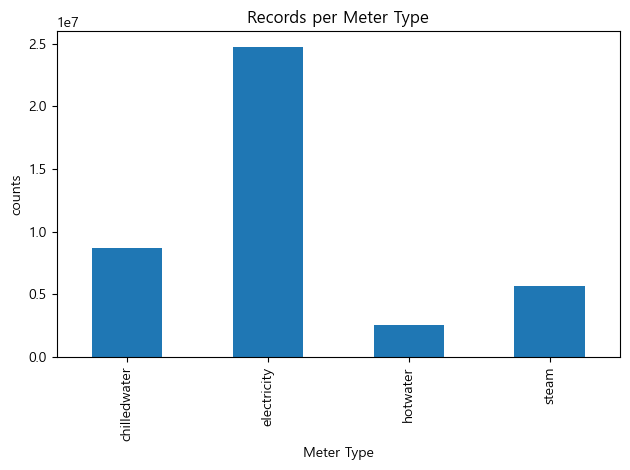

In [15]:
meter_mapping = {
    0: 'electricity',
    1: 'chilledwater',
    2: 'steam',
    3: 'hotwater'
}
test_df['meter'] = test_df['meter'].map(meter_mapping)
test_df = test_df[test_df['meter'].notna()]
meter_counts = test_df['meter'].value_counts().sort_index()

plt.figure()
meter_counts.plot(kind='bar')
plt.title('Records per Meter Type')
plt.xlabel('Meter Type')
plt.ylabel('counts')
plt.tight_layout()
plt.show()


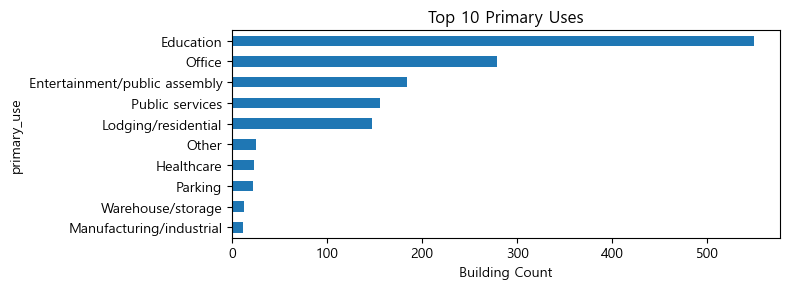

In [16]:
pu_counts = building_meta_df['primary_use'].value_counts().head(10)
plt.figure(figsize=(8,3))
pu_counts.plot(kind='barh')
plt.title('Top 10 Primary Uses')
plt.xlabel('Building Count')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

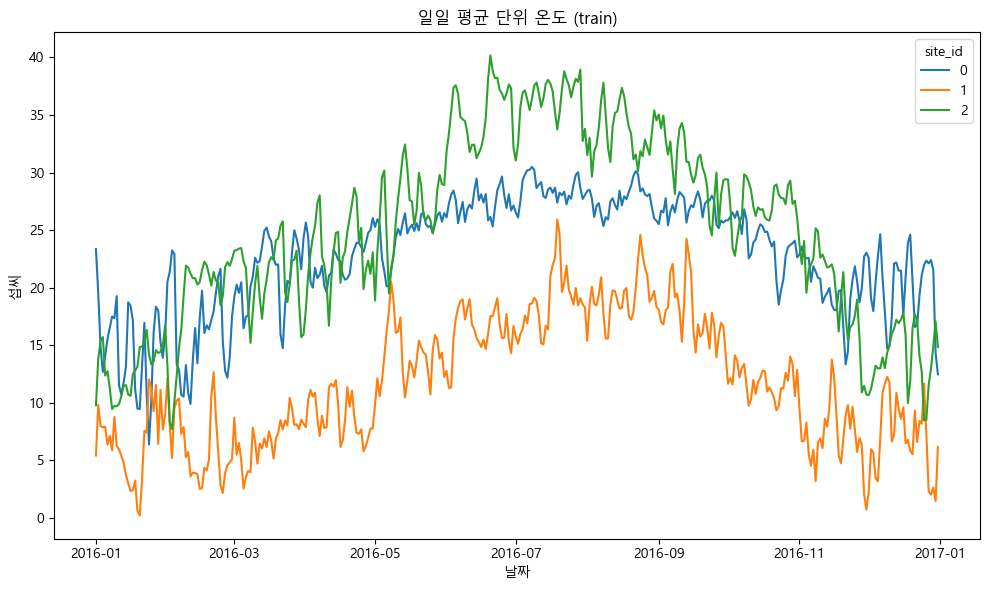

In [32]:
weather_train_df['timestamp'] = pd.to_datetime(weather_train_df['timestamp'])
tmp = weather_train_df.groupby(['site_id', weather_train_df['timestamp'].dt.date])['air_temperature'].mean().reset_index()
pivoted = tmp.pivot(index='timestamp', columns='site_id', values='air_temperature')
pivoted.iloc[:, :3].plot(figsize=(10,6))
plt.title('일일 평균 단위 온도 (train)')
plt.xlabel('날짜')
plt.ylabel('섭씨')
plt.tight_layout()
plt.show()

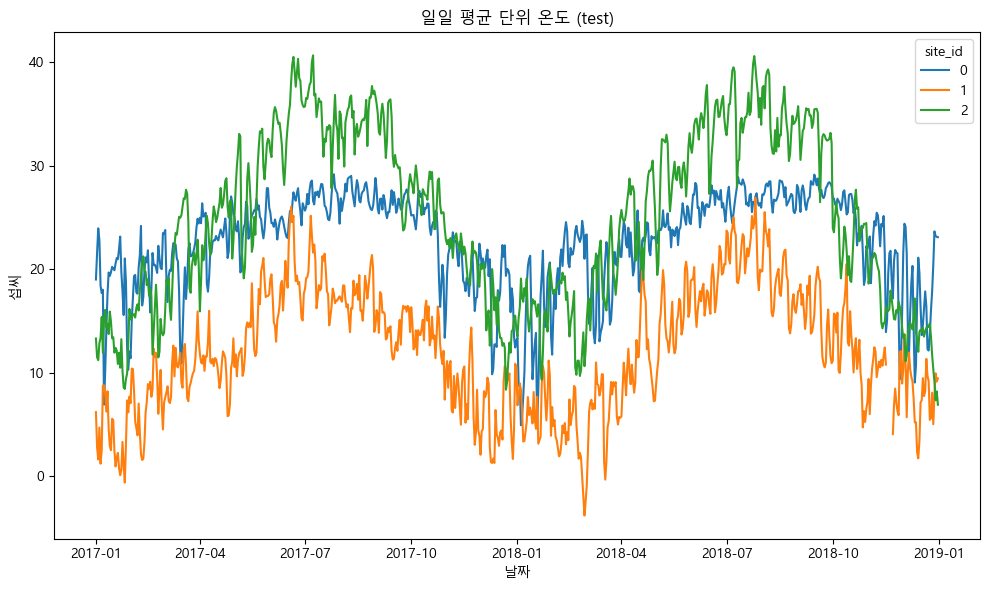

In [33]:
weather_test_df['timestamp'] = pd.to_datetime(weather_test_df['timestamp'])
tmp = weather_test_df.groupby(['site_id', weather_test_df['timestamp'].dt.date])['air_temperature'].mean().reset_index()
pivoted = tmp.pivot(index='timestamp', columns='site_id', values='air_temperature')
pivoted.iloc[:, :3].plot(figsize=(10,6))
plt.title('일일 평균 단위 온도 (test)')
plt.xlabel('날짜')
plt.ylabel('섭씨')
plt.tight_layout()
plt.show()

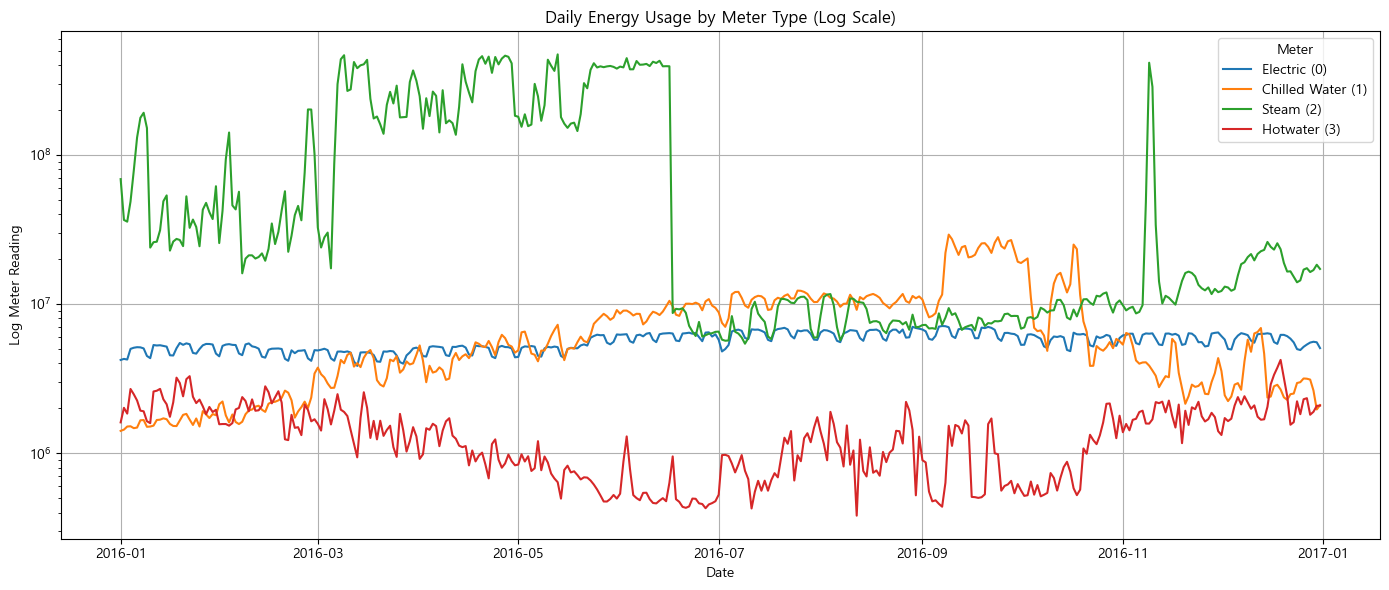

In [116]:
train_df['date'] = pd.to_datetime(train_df['timestamp']).dt.date

daily_usage = train_df.groupby(['date', train_df['meter']])['meter_reading'].sum().reset_index()

pivot_df = daily_usage.pivot(index='date', columns='meter', values='meter_reading')

pivot_df.plot(figsize=(14,6), logy=True)
plt.title("Daily Energy Usage by Meter Type (Log Scale)")
plt.xlabel("Date")
plt.ylabel("Log Meter Reading")
plt.legend(title="Meter", labels=["Electric (0)", "Chilled Water (1)", "Steam (2)", "Hotwater (3)"])
plt.grid(True)
plt.tight_layout()
plt.show()